In [1]:
seoul <- read.csv("./Data/newSeoul2019.csv")
head(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


In [2]:
head(seoul)
tail(seoul)

년도,월,자치구명,발생건수,사망자수,부상자수
2011,1,종로구,115,2,165
2011,2,종로구,99,0,134
2011,3,종로구,116,0,162
2011,4,종로구,110,1,153
2011,5,종로구,122,0,157
2011,6,종로구,116,3,163


,년도,월,자치구명,발생건수,사망자수,부상자수
2695,2019,7,강동구,146,2,189
2696,2019,8,강동구,127,2,175
2697,2019,9,강동구,98,2,137
2698,2019,10,강동구,108,1,144
2699,2019,11,강동구,146,0,199
2700,2019,12,강동구,108,1,131


In [3]:
str(seoul)

'data.frame':	2700 obs. of  6 variables:
 $ 년도    : int  2011 2011 2011 2011 2011 2011 2011 2011 2011 2011 ...
 $ 월      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ 자치구명: Factor w/ 25 levels "강남구","강동구",..: 23 23 23 23 23 23 23 23 23 23 ...
 $ 발생건수: int  115 99 116 110 122 116 103 122 121 135 ...
 $ 사망자수: int  2 0 0 1 0 3 1 1 2 2 ...
 $ 부상자수: int  165 134 162 153 157 163 154 171 166 193 ...


In [4]:
summary(seoul)

      년도            월           자치구명       발생건수        사망자수     
 Min.   :2011   Min.   : 1.00   강남구 : 108   Min.   : 45.0   Min.   : 0.000  
 1st Qu.:2013   1st Qu.: 3.75   강동구 : 108   1st Qu.:100.0   1st Qu.: 0.000  
 Median :2015   Median : 6.50   강북구 : 108   Median :122.0   Median : 1.000  
 Mean   :2015   Mean   : 6.50   강서구 : 108   Mean   :133.3   Mean   : 1.207  
 3rd Qu.:2017   3rd Qu.: 9.25   관악구 : 108   3rd Qu.:149.0   3rd Qu.: 2.000  
 Max.   :2019   Max.   :12.00   광진구 : 108   Max.   :383.0   Max.   :10.000  
                                (Other):2052                                   
    부상자수    
 Min.   : 55.0  
 1st Qu.:138.0  
 Median :168.0  
 Mean   :187.4  
 3rd Qu.:208.0  
 Max.   :552.0  
                

In [5]:
# 상관계수

cor(seoul$발생건수,seoul$부상자수)

[1] 0.9808932

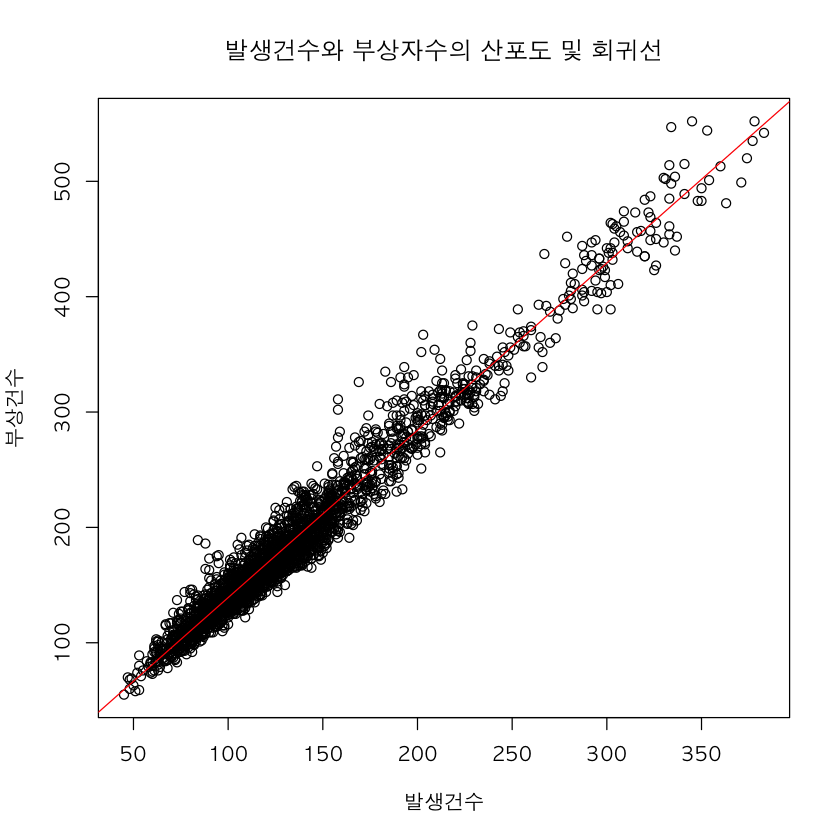

In [10]:
options(warn=-1)
par(family = "AppleGothic")
plot(seoul$발생건수,seoul$부상자수,
     xlab = '발생건수',
     ylab = '부상건수',
     main = '발생건수와 부상자수의 산포도 및 회귀선'
    )
r <- lm(seoul$부상자수~seoul$발생건수)
abline(r,col="red")

In [11]:
summary(r)


Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Residuals:
    Min      1Q  Median      3Q     Max 
-43.154  -9.797  -1.421   7.611  87.718 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -5.895918   0.794301  -7.423 1.53e-13 ***
seoul$발생건수  1.450495   0.005539 261.890  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.23 on 2698 degrees of freedom
Multiple R-squared:  0.9622,	Adjusted R-squared:  0.9621 
F-statistic: 6.859e+04 on 1 and 2698 DF,  p-value: < 2.2e-16


> Adjusted R-squred : 0.9621

In [12]:
r


Call:
lm(formula = seoul$부상자수 ~ seoul$발생건수)

Coefficients:
   (Intercept)  seoul$발생건수  
        -5.896           1.450  


In [13]:
# 회귀식

# -발생건수가 100건일 경우의 부상자수 예측
 1.450 * 100 - 5.896

[1] 139.104

In [15]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In [16]:
# 랜덤포레스트로 예측
# -발생건수가 100건일 경우의 부상자수 예측

result = c()
for(i in 1:5){
    model.rf <- randomForest(부상자수~발생건수,data=seoul,ntree=100)
    pred <- predict(model.rf,data.frame(발생건수=100))
    result <- append(result,pred)
}
result
mean(result)

1        1        1        1        1 
137.3547 137.8865 137.6896 137.8479 137.7231

[1] 137.7004